# Final exam 2021
Maria Jose Medina Hernandez

In [81]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scp
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.power as smp
import random

sns.set(rc={'figure.figsize':(12, 12)})

## Data Extraction

In [2]:
path = 'PreviousExams/data/empleados.csv'
data = pd.read_csv(path)
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobLevel,JobRole,JobSatisfaction,MaritalStatus,...,NumCompaniesWorked,OverTime,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,RateType,Rate,Education_Field
0,31,No,Travel_Rarely,Research_Development,23.0,Male,2,Healthcare_Representative,Very_High,Married,...,0.0,No,Outstanding,10,2,9,0,DailyRate,1463,Bachelor//Medical
1,31,No,Travel_Rarely,Research_Development,23.0,Male,2,Healthcare_Representative,Very_High,Married,...,0.0,No,Outstanding,10,2,9,0,HourlyRate,64,Bachelor//Medical
2,31,No,Travel_Rarely,Research_Development,23.0,Male,2,Healthcare_Representative,Very_High,Married,...,0.0,No,Outstanding,10,2,9,0,MonthlyRate,14408,Bachelor//Medical
3,31,Yes,Travel_Frequently,Research_Development,15.0,Male,1,Laboratory_Technician,High,Married,...,1.0,No,Excellent,2,5,2,2,DailyRate,874,Bachelor//Medical
4,31,Yes,Travel_Frequently,Research_Development,15.0,Male,1,Laboratory_Technician,High,Married,...,1.0,No,Excellent,2,5,2,2,HourlyRate,72,Bachelor//Medical


## Exercise 1

#### Q1
**How many observations are there in the table? How many variables? Are there missing data? If the answer
to the last question is affirmative, locate these missing data indicating in which rows and columns they are found.
columns. Then, before proceeding further, delete the rows containing these data from the table.**

In [3]:
print(f"There are {len(data)} observations in the table")

There are 3528 observations in the table


In [4]:
print(f"There are {len(data.columns)} variables in the table")

There are 21 variables in the table


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3528 entries, 0 to 3527
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    3528 non-null   int64  
 1   Attrition              3528 non-null   object 
 2   BusinessTravel         3528 non-null   object 
 3   Department             3528 non-null   object 
 4   DistanceFromHome       3519 non-null   float64
 5   Gender                 3528 non-null   object 
 6   JobLevel               3528 non-null   int64  
 7   JobRole                3528 non-null   object 
 8   JobSatisfaction        3528 non-null   object 
 9   MaritalStatus          3528 non-null   object 
 10  MonthlyIncome          3528 non-null   int64  
 11  NumCompaniesWorked     3522 non-null   float64
 12  OverTime               3528 non-null   object 
 13  PerformanceRating      3528 non-null   object 
 14  TotalWorkingYears      3528 non-null   int64  
 15  Trai

There are missing data in the columns 'DistanceFromHome' and 'NumCompaniesWorked'. The rows where this occurs are the following:

In [6]:
na_rows = data[data.DistanceFromHome.isna() | data.NumCompaniesWorked.isna()].index
print(f"The rows where there is missing data are {len(na_rows)}: {na_rows}")

The rows where there is missing data are 15: Int64Index([30, 31, 32, 147, 148, 149, 897, 898, 899, 1092, 1093, 1094, 1593,
            1594, 1595],
           dtype='int64')


We delete the missing data

In [7]:
data = data.dropna()

In [8]:
data.shape

(3513, 21)

#### Q2
**Let's look at the last three columns of the table, which are:
RateType, Rate, Education_Field.**

**In particular, you will see that the Rate and RateType columns do not meet one of the conditions that define tidy datasets, because the Rate column mixes the values of more than one
tidy data sets, because the Rate column mixes the values of more than one variable.
The corresponding variable is indicated in the Rate_type column. On the other hand, Education_Field
violates another of these conditions, because each row of this table combines the values of two variables. At
this section you should clean up the dataset using the tidyverse tools. Display
the result using select so that the output of the code shows only the variables that have been modified in this
modified in this section (be careful, do not modify the data when doing this!).**

We look up the columns mentioned to see whats happening

In [9]:
data[["Rate", "RateType"]].head()

,Rate,RateType
0,1463,DailyRate
1,64,HourlyRate
2,14408,MonthlyRate
3,874,DailyRate
4,72,HourlyRate


We can see that there should be multiple columns in stead of one. We check that there are only the three values of RateType that are visible above and we create three columns accordingly

In [10]:
data.RateType.value_counts(dropna=False)

MonthlyRate    1171
DailyRate      1171
HourlyRate     1171
Name: RateType, dtype: int64

In [11]:
data["HourlyRate"] = data[data.RateType == 'HourlyRate'].Rate
data["DailyRate"] = data[data.RateType == 'DailyRate'].Rate
data["MonthlyRate"] = data[data.RateType == 'MonthlyRate'].Rate

We display the new columns

In [12]:
data[["HourlyRate", "DailyRate", "MonthlyRate"]].head()

,HourlyRate,DailyRate,MonthlyRate
0,NaN,1463.0,NaN
1,64.0,NaN,NaN
2,NaN,NaN,14408.0
3,NaN,874.0,NaN
4,72.0,NaN,NaN


In [13]:
data.Education_Field.value_counts(dropna=False)

Bachelor//Life_Sciences            558
Bachelor//Medical                  456
Master//Life_Sciences              393
College//Life_Sciences             282
Master//Medical                    258
College//Medical                   210
Below_College//Medical             162
Below_College//Life_Sciences       150
Bachelor//Marketing                141
Bachelor//Technical_Degree         138
Master//Marketing                  105
Master//Other                       87
Master//Technical_Degree            75
Bachelor//Other                     63
College//Other                      57
College//Technical_Degree           54
College//Marketing                  48
Doctor//Life_Sciences               48
Bachelor//Human_Resources           45
Below_College//Technical_Degree     42
Doctor//Medical                     36
Doctor//Marketing                   30
Below_College//Marketing            27
Master//Human_Resources             15
Below_College//Other                12
Doctor//Technical_Degree 

In [17]:
ed = data["Education_Field"].str.split(pat="//", expand=True) 

In [123]:
data[['Education', 'Field']] = data.Education_Field.str.split('//',expand=True)
data[['Education_Field', 'Education', 'Field']].head()

,Education_Field,Education,Field
0,Bachelor//Medical,Bachelor,Medical
1,Bachelor//Medical,Bachelor,Medical
2,Bachelor//Medical,Bachelor,Medical
3,Bachelor//Medical,Bachelor,Medical
4,Bachelor//Medical,Bachelor,Medical


#### C3
**Once the data is cleaned: what type are the variables in the data set? Make sure that all variables in this table that have been read as character are converted to factors.
This table that have been read as character are converted to factors. See the mutate_if
to do this if you need to.**

**Then make a list of quantitative variables and a list of qualitative variables (factors).
Which, within the latter, are ordered factors (it is not necessary to include the order in the transformation process).?** 

**Then make a list of quantitative variables and a list of qualitative variables (factors).**

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3513 entries, 0 to 3527
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    3513 non-null   int64  
 1   Attrition              3513 non-null   object 
 2   BusinessTravel         3513 non-null   object 
 3   Department             3513 non-null   object 
 4   DistanceFromHome       3513 non-null   float64
 5   Gender                 3513 non-null   object 
 6   JobLevel               3513 non-null   int64  
 7   JobRole                3513 non-null   object 
 8   JobSatisfaction        3513 non-null   object 
 9   MaritalStatus          3513 non-null   object 
 10  MonthlyIncome          3513 non-null   int64  
 11  NumCompaniesWorked     3513 non-null   float64
 12  OverTime               3513 non-null   object 
 13  PerformanceRating      3513 non-null   object 
 14  TotalWorkingYears      3513 non-null   int64  
 15  Trai

In [21]:
print(f"The qualitative factors are: {data.select_dtypes(include=[object]).columns}")

The qualitative factors are: Index(['Attrition', 'BusinessTravel', 'Department', 'Gender', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating',
       'RateType', 'Education_Field', 'EducationLevel', 'EducationField'],
      dtype='object')


Of those, ordered factors are: BusinessTravel, JobSatisfaction, PerformanceRating, RateType, EducationLevel

## Exercise 2

#### C4
**Graph the distribution of the variable age Age by means of a histogram with the density curve of the superimposed variable.
density curve of the superimposed variable.**

**Also represent a boxplot of the variable age. Optionally
you can use a violinpot or add the sample points (in this case make sure that they do not block the boxplot).**

Histogram with density curve superimposed

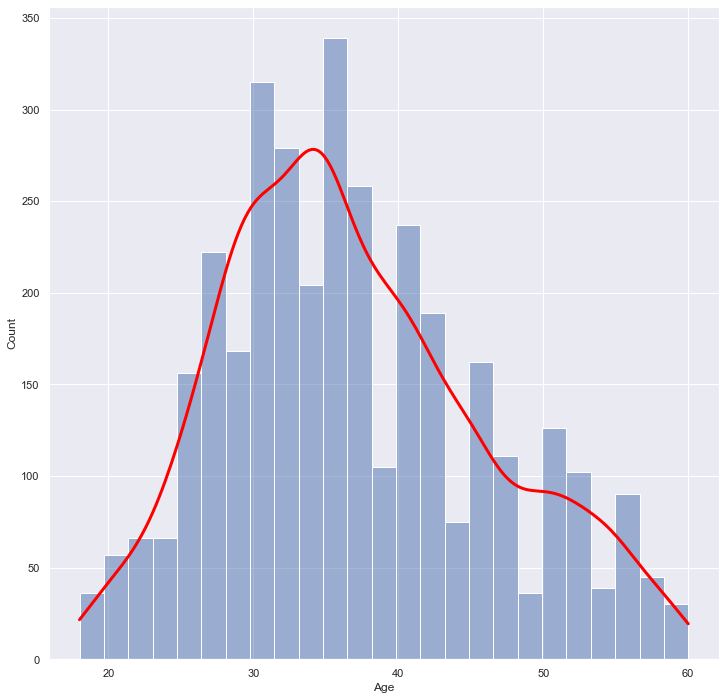

In [22]:
dens_plot = sns.histplot(data = data, x = 'Age', kde=True)
dens_plot.lines[0].set_color('red')
dens_plot.lines[0].set_linewidth(3)

Boxplot

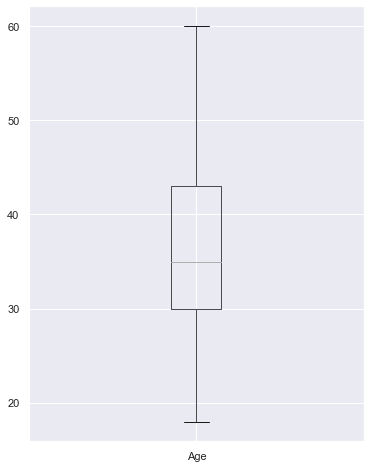

In [23]:
getPlot = data.boxplot(column='Age', figsize=(6, 8))

#### C5 
**Estudia gráficamente (por ejemplo con boxplots) la relación entre la variable Age y la variable
Attrition. ¿Influye el género en esa relación? Usa los recursos gráficos para discutir la
respuesta, lo que se busca es un juicio inicial basado en una exploración gráfica.**

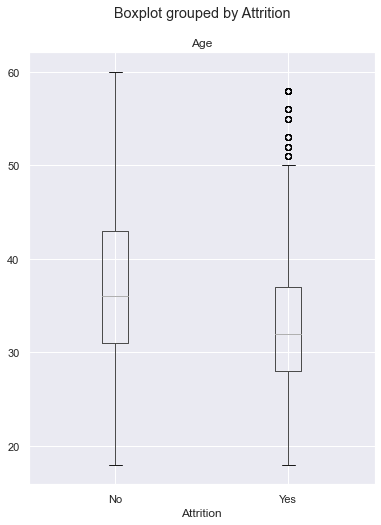

In [24]:
getPlot = data.boxplot(column='Age', by = 'Attrition', figsize=(6, 8))

Most employees that present attrition are older

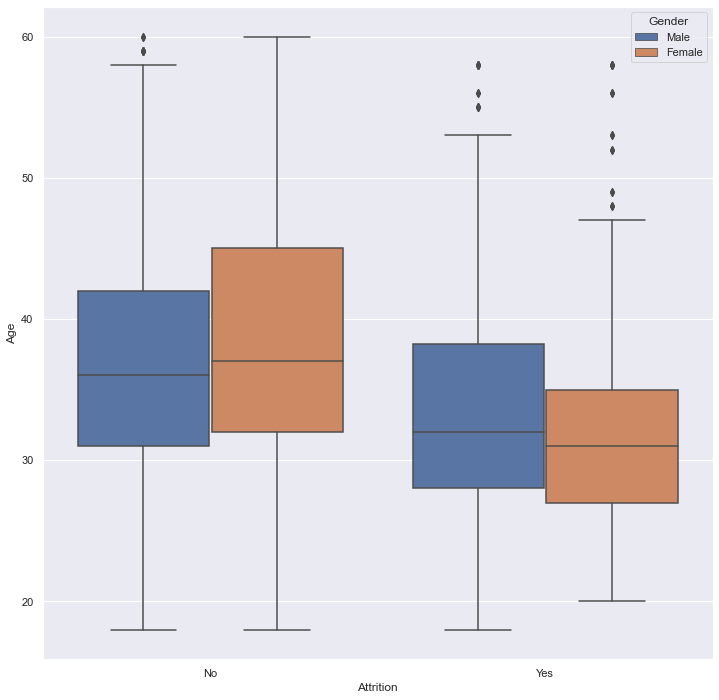

In [126]:
sns.boxplot(x='Attrition', y='Age', hue='Gender', data=data)
plt.show()

The difference is bigger for women

#### C6
**Haz la tabla de frecuencias absolutas del factor JobSatisfaction. Después haz una representación
gráfica adecuada de esa tabla. Opcionales:**

    + **Juega con los argumentos fill y position de ggplot para incorporar al gráfico la información
    de Attrition mediante colores.**
    + ** ten en cuenta que JobSatisfaction es un factor ordenado y trata de incorporar esa ordenación a
    la representación gráfica. Indicación: usa la función factor y sus argumentos levels y ordered
    para esto.**

In [26]:
data.JobSatisfaction.value_counts(dropna=False)

Very_High    1107
High         1056
Low           693
Medium        657
Name: JobSatisfaction, dtype: int64

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

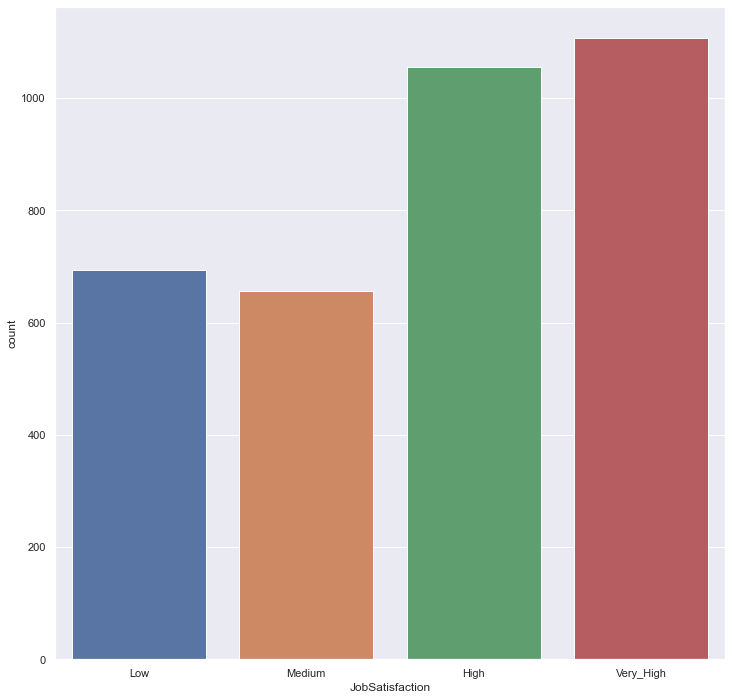

In [27]:
order = ["Low", "Medium", "High", "Very_High"]
sns.countplot(x = "JobSatisfaction", data = data, order = order)

We need to add the Attrition

In [130]:
CT = pd.crosstab(data.JobSatisfaction, data.Attrition, margins=True)
CT

Attrition,No,Yes,All
JobSatisfaction,,,
High,891,165,1056
Low,534,159,693
Medium,555,102,657
Very_High,990,117,1107
All,2970,543,3513


In [129]:
# We add to the table the totals for each row
CT['total'] = CT.sum(axis=1)
# Sort the table using those totals
CT.sort_values('total', inplace=True)
# Remove them so thay do not interfere with the graphic
CT2= CT.drop(columns=['total']).sort_index()
CT2

Attrition,No,Yes
JobSatisfaction,,
High,891,165
Low,534,159
Medium,555,102
Very_High,990,117


## Exercise 3

#### C7
**Calcula la mediana del salario mensual para cada departamento y cada nivel dentro de ese departamento. Ordena la respuesta de mayor a menor y asegúrate de que en la tabla de salida se muestran
las columnas relevantes.**


In [131]:
data.groupby(["Department", "JobLevel"])["MonthlyIncome"].median().sort_values(ascending= False)

Department            JobLevel
Research_Development  5           19326.0
Human_Resources       5           19189.0
Sales                 5           19068.0
Human_Resources       4           16799.0
Research_Development  4           16413.0
Sales                 4           15427.0
Research_Development  3           10293.0
Human_Resources       3            9756.0
Sales                 3            9419.0
Human_Resources       2            5910.0
Sales                 2            5396.0
Research_Development  2            5238.0
Human_Resources       1            2706.0
Research_Development  1            2700.0
Sales                 1            2575.5
Name: MonthlyIncome, dtype: float64

In [118]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Gender', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PerformanceRating',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'RateType', 'Rate', 'Education_Field',
       'HourlyRate', 'DailyRate', 'MonthlyRate', 'EducationLevel',
       'EducationField'],
      dtype='object')

#### C8
**If we randomly choose an employee whose JobSatisfaction is
VeryHigh, calculate the probability that he/she is single.**

**If we randomly choose an employee from the company
what is the probability that she is a woman who has been with the company for more than five years?**


Probability that an employee with very high job satisfaction is single

In [28]:
vh_js = data[data.JobSatisfaction == 'Very_High']
vh_js.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobLevel,JobRole,JobSatisfaction,MaritalStatus,...,YearsAtCompany,YearsInCurrentRole,RateType,Rate,Education_Field,HourlyRate,DailyRate,MonthlyRate,EducationLevel,EducationField
0,31,No,Travel_Rarely,Research_Development,23.0,Male,2,Healthcare_Representative,Very_High,Married,...,9,0,DailyRate,1463,Bachelor//Medical,NaN,1463.0,NaN,Bachelor,Medical
1,31,No,Travel_Rarely,Research_Development,23.0,Male,2,Healthcare_Representative,Very_High,Married,...,9,0,HourlyRate,64,Bachelor//Medical,64.0,NaN,NaN,Bachelor,Medical
2,31,No,Travel_Rarely,Research_Development,23.0,Male,2,Healthcare_Representative,Very_High,Married,...,9,0,MonthlyRate,14408,Bachelor//Medical,NaN,NaN,14408.0,Bachelor,Medical
6,30,No,Non-Travel,Research_Development,2.0,Female,1,Laboratory_Technician,Very_High,Single,...,11,7,DailyRate,1116,Bachelor//Medical,NaN,1116.0,NaN,Bachelor,Medical
7,30,No,Non-Travel,Research_Development,2.0,Female,1,Laboratory_Technician,Very_High,Single,...,11,7,HourlyRate,49,Bachelor//Medical,49.0,NaN,NaN,Bachelor,Medical


In [31]:
p = sum(vh_js.MaritalStatus == 'Single')/len(vh_js)
print(f"The probability that an employee with very high satisfaction is single is {p}")

The probability that an employee with very high satisfaction is single is 0.35501355013550134


In [40]:
p = sum((data.Gender == 'Female') & (data.YearsAtCompany > 5))/len(data)
print(f"The probability that an employee is a woman who has spent more than 5 years at the company is {p}")

The probability that an employee is a woman who has spent more than 5 years at the company is 0.19726729291204098


#### C9
**If we choose 12 employees from this company at random and with replacement, what is the probability that 4 of them have worked in 3 or more companies (NumCompaniesWorked)?**

In [66]:
N = 100000 # Number of iterations of the experiment
n = 12 # number of employees
sample = data.sample(n*N, replace = True) # We sample n employees with replacement N times
samples = sample.NumCompaniesWorked.values.reshape([n, N]) # We reshape the sample into a nxN matrix in order to keep the experiments separated

In [67]:
more3 = sum(samples >= 3) # We get the number of employees that have worked in more than 3 companies per experiment (sum of each column)
p = sum(more3 == 4)/N # We get the proportion of experiments where there are excatly 4 employees that have worked in more than 3 companies
p

0.20001

#### C10
**Make a contingency table (two by two) of Attrition versus Overtime, the variable that tells us whether or not an employee works overtime. Suppose we want to use Overtime as a kind of diagnostic test of Attrition's values, equating sick/unhealthy with Attrition
Yes/No and positive/negative test with Overtime Yes/No. What is the false positive rate of this test?
What is the accuracy of the test? Optional: what are its sensitivity and specificity?**


Contingency table

In [70]:
pd.crosstab(index=data['Attrition'], columns=data['OverTime'], margins=True)

OverTime,No,Yes,All
Attrition,,,
No,2295,675,2970
Yes,249,294,543
All,2544,969,3513


Relative contingency table

In [133]:
CT = pd.crosstab(index=data['OverTime'], columns=data['Attrition'], margins=True, normalize=True)
CT

Attrition,No,Yes,All
OverTime,,,
No,0.653288,0.070880,0.724167
Yes,0.192143,0.083689,0.275833
All,0.845431,0.154569,1.000000


In [135]:
CT_np = CT.to_numpy()
CT_np

array([[0.65328779, 0.07087959, 0.72416738],
       [0.19214347, 0.08368915, 0.27583262],
       [0.84543126, 0.15456874, 1.        ]])

In [138]:
Acc = CT_np[0, 0] + CT_np[1,1]
Acc

0.7369769427839454

+ False positive rate: 0.192143
+ Accuracy: 0.653288 + 0.083689 = 0.736977
+ Sensitivity: TP/(TP + FN) = 0.083689 / 0.154569 = 0.5414
+ Specificity: TN/(TN + FP) = 0.653288 / 0.845431 = 0.7727

In [77]:
0.653288 / 0.845431

0.7727277566117163

## Exercise 4

#### C11
**Assuming normality of the data, calculate a 95% confidence interval for the mean age of employees in the company's largest department. Optional: do you think that the hypothesis of normality of these data is justified?**

In [79]:
n = len(data)
barX = data.Age.mean()
s = data.Age.std()

# Short version of the critical point computation:
cl = 0.95
alpha = 1 - cl
crit_point = stats.norm.isf(alpha/2, loc = 0, scale = 1)

conf_int = barX + np.array([-1, 1]) * crit_point * s / np.sqrt(n)
print("The confidence interval is ", conf_int)
print("Rounded to 4 digits: [{:.4}, {:.4}]".format(conf_int[0], conf_int[1]))

The confidence interval is  [36.63024968 37.23140702]
Rounded to 4 digits: [36.63, 37.23]


Looking at the hystogram and density curve, the distribution looks aprox normal. Plus, the samble is larger than 30, so we do not need the t-student.

#### C12
**Take a random, replacement sample of 20 employees from the sales department
and test (at 95% significance) the null hypothesis: the average distance to their home is
9 km. Be sure to keep the set.seed command as the first line of your answer in this section to ensure reproducibility.
to ensure reproducibility.**

In [87]:
random.seed(2021)

In [88]:
n = 20 # number of employees
sample = data.sample(n, replace = True)

In [89]:
X = sample.DistanceFromHome

mu0 = 9 # Change to null hypothesis mean
alternative = 'two-sided'

Tscore, pValue = stats.ttest_1samp(X, 
                                   popmean=mu0,
                                   alternative=alternative)

print("The sample size is {:3d}".format(len(X)))
print("The sample mean is {:.4}".format(X.mean()))
print("The T score is {:.4}".format(Tscore))
print("And the corresponding p-value is {:.4}".format(pValue))

The sample size is  20
The sample mean is 7.5
The T score is -0.8423
And the corresponding p-value is 0.4101


The p-value is 0.6061. Therefore, we do not reject the null hypothesis

#### C13
**Considerando los empleados del departamento Research_Development vamos a hacer un modelo
de regresión lineal para las dos variables:
x : YearsAtCompany y : MonthlyIncome.
Construye el modelo usando la función lm y además dibuja el diagrama de dispersión de esas variables
junto con la recta de regresión obtenida. ¿Qué porcentaje de la variabilidad en el salario mensual se
explica con el modelo? ¿Cuánto se incrementa el salario mensual de un empleado de ese departamento
por cada año de antigüedad en la empresa?**

First, we filter the department

In [94]:
rd = data[data.Department == 'Research_Development']

First, we are going to plot the two variables to see how they look like

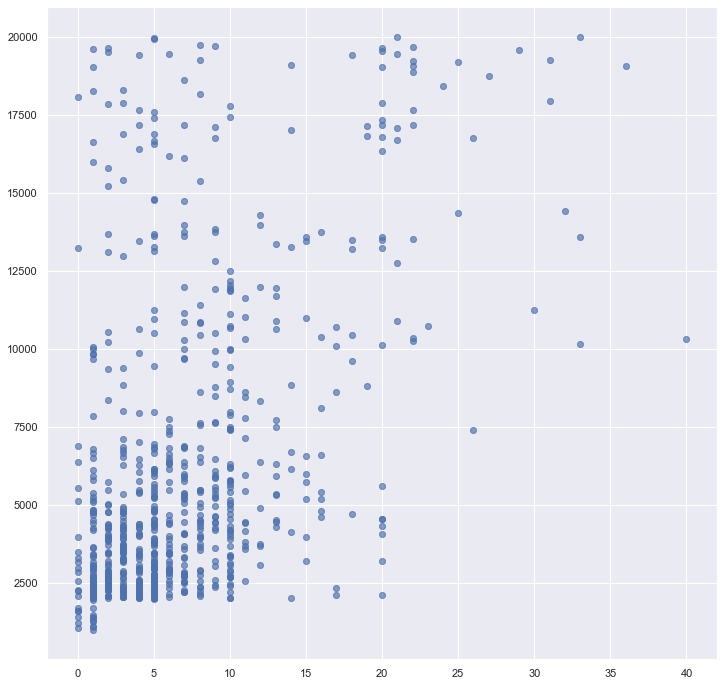

In [99]:
#Plot the sample
plt.scatter(rd.YearsAtCompany, rd.MonthlyIncome, alpha=0.3)
# And the regression line = "predicted points"
plt.show()

At first sight, it like there is some correlation between the number of years at the company and the monthly income. However, the variance is not constant.

In [101]:
# The linear regression model in Scikit requires that
# the X array be two-dimensional. But in our case a 
# single column gives a 1D array. That is why, after
# extracting the values from the columns we reshape it.
X = rd.YearsAtCompany.values
X = X[:, np.newaxis]

# For Y it is enough to extract the values,
# because Scikit already expects it to be 1D
Y = rd.MonthlyIncome.values

# Now we load the required function from the scikit module
from sklearn.linear_model import LinearRegression
# Create the model
modelXY = LinearRegression(fit_intercept=True)
# Fit the model to 
XY_fit = modelXY.fit(X, Y)

# And extract the coefficients. 
# Note that b1 is returned as an array 
b1 = XY_fit.coef_[0]
b0 = XY_fit.intercept_

print("The regression line is y = {:.6} + {:.6} x".format(b0, b1))

The regression line is y = 3599.45 + 386.921 x


The salary augments in 386.921 for every year at the company

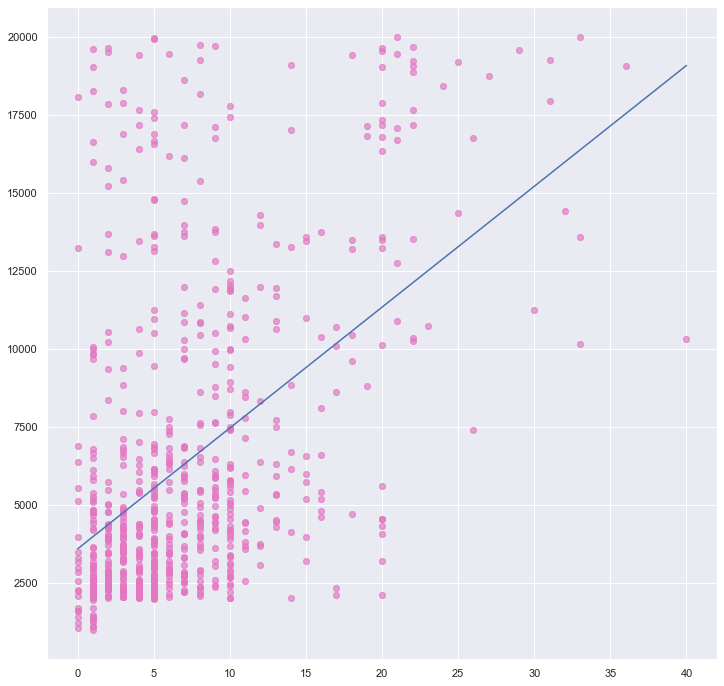

In [114]:
# The linspace funtion generates the grid
X_new = np.linspace(X.min(), X.max(), num = 100)
# Make it 2D
X_new = X_new[:, np.newaxis]

# Predict the corresponding Y-values
Y_new = XY_fit.predict(X_new)

#Plot the sample
plt.scatter(X, Y, alpha=0.3, c = '#e377c2')
# And the regression line = "predicted points"
plt.plot(X_new, Y_new)
plt.show()

Scatterplot

Here we can see the regression line

In [105]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
X_1 = sm.add_constant(X)
model_DF0 = sm.OLS(Y, X_1) # OLS comes from Ordinary Least Squares
DF0_fit = model_DF0.fit()
DF0_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     717.6
Date:                Sat, 15 Oct 2022   Prob (F-statistic):          6.64e-138
Time:                        17:54:27   Log-Likelihood:                -22599.
No. Observations:                2313   AIC:                         4.520e+04
Df Residuals:                    2311   BIC:                         4.521e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3599.4544    133.251     27.012      0.000    3338.149    3860.759
x1           386.9214     14.443     26.789      0.000     358.598     415.245
==============================================================================
Omnibus:                      597.690   Durbin-Watson:                   0.643
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1289.378
Skew:                           1.482   Prob(JB):                    1.04e-280
Kurtosis:                       5.142   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value is lower than 0.05

The percentage explained is 0.237